$$
p(x_1, x_2, \ldots, x_n) = \sum_{i_1=0}^{N-1} \sum_{i_2=0}^{N-1} \ldots \sum_{i_n=0}^{N-1} c_{i_1 i_2 \ldots i_n} \cdot L_{i_1}(x_1) \cdot L_{i_2}(x_2) \cdot \ldots \cdot L_{i_n}(x_n)
$$


In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import time

In [2]:
import math

# Definición de la función de Legendre
def legendre(n, x):
    if n == 0:
        return 1.0
    elif n == 1:
        return x
    else:
        return ((2.0 * n - 1.0) * x * legendre(n - 1, x) - (n - 1) * legendre(n - 2, x)) / n

# Definición de la función que evalúa la serie de Legendre 2-D
def evaluate_legendre_series(x, y, coefficients):
    sum = 0.0
    n = int(math.sqrt(len(coefficients)))  # Asume que los coeficientes están en un arreglo 1-D de longitud n^2
    for i in range(n):
        for j in range(n):
            sum += coefficients[i * n + j] * legendre(i, x) * legendre(j, y)
    return sum

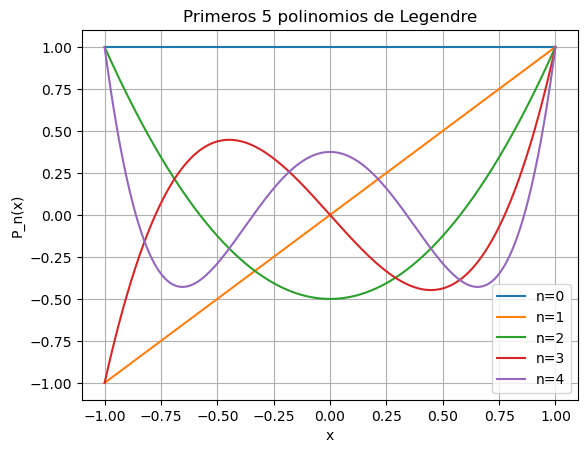

In [3]:
# Genera los valores de x
x = np.linspace(-1, 1, 1000)

# Grafica los primeros 5 polinomios de Legendre
for n in range(5):
    y = [legendre(n, xi) for xi in x]
    plt.plot(x, y, label=f'n={n}')

plt.legend()
plt.title('Primeros 5 polinomios de Legendre')
plt.xlabel('x')
plt.ylabel('P_n(x)')
plt.grid(True)
plt.show()

In [4]:
from scipy.optimize import minimize
import numpy as np

# Define the function for which you want to calculate the Legendre series coefficients
def f(x1, x2):
    return np.sin(x1) * np.cos(x2)

# Define the error function
def error_function(coefficients):
    approximation = evaluate_legendre_series(X1, X2, coefficients)
    error = np.sum((f(X1, X2) - approximation) ** 2)
    return error

# Choose an initial guess for the coefficients and bounds for them
N = 7  # Maximum degree of the Legendre polynomials
initial_guess = np.zeros(N * N)  # Initial guess for the coefficients
bounds = [(-1, 1)] * N * N  # Bounds for the coefficients

# Input data for the function and the Legendre polynomials
X1, X2 = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

# Use an optimization function to minimize the error function with respect to the coefficients
result = minimize(error_function, initial_guess, bounds=bounds)

# Optimal coefficients found
optimal_coefficients = result.x

print("Optimal coefficients:")
print(optimal_coefficients)

Optimal coefficients:
[-5.79054146e-09  2.27437422e-08 -1.08843434e-07 -2.73645144e-09
 -1.68922126e-08 -2.66513880e-09 -1.35590906e-08  7.60273789e-01
 -4.47203597e-09 -2.80245190e-01 -4.16592066e-09  8.22147910e-03
 -3.91922212e-09 -8.43647832e-05 -1.09611461e-07 -3.80530732e-09
 -6.60289124e-09 -4.02773655e-09 -4.59972174e-09 -3.56250440e-09
 -4.56890900e-09 -5.30519658e-02 -4.15794381e-09  1.95556369e-02
 -3.63584261e-09 -5.74801910e-04 -3.48734775e-09  5.56958898e-06
 -1.69988855e-08 -3.36919233e-09 -4.66809598e-09 -3.49469747e-09
 -2.65675477e-09 -3.14627816e-09 -4.46458844e-09  8.56422189e-04
 -3.94337993e-09 -3.15476197e-04 -3.48381916e-09  8.96581943e-06
 -3.91299074e-09  6.67827706e-07 -1.36223473e-08 -2.88273801e-09
 -4.84675938e-09 -2.87419495e-09 -5.16341094e-09 -2.68356048e-09
  2.51447136e-09]


/tmp/ipykernel_74636/1301144535.py:13: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'edgecolor'
  ax1.contourf(X1, X2, Z1, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
/tmp/ipykernel_74636/1301144535.py:18: UserWarning: The following kwargs were not used by contour: 'rstride', 'cstride', 'edgecolor'
  ax2.contourf(X1, X2, Z2, rstride=1, cstride=1, cmap='viridis', edgecolor='none')


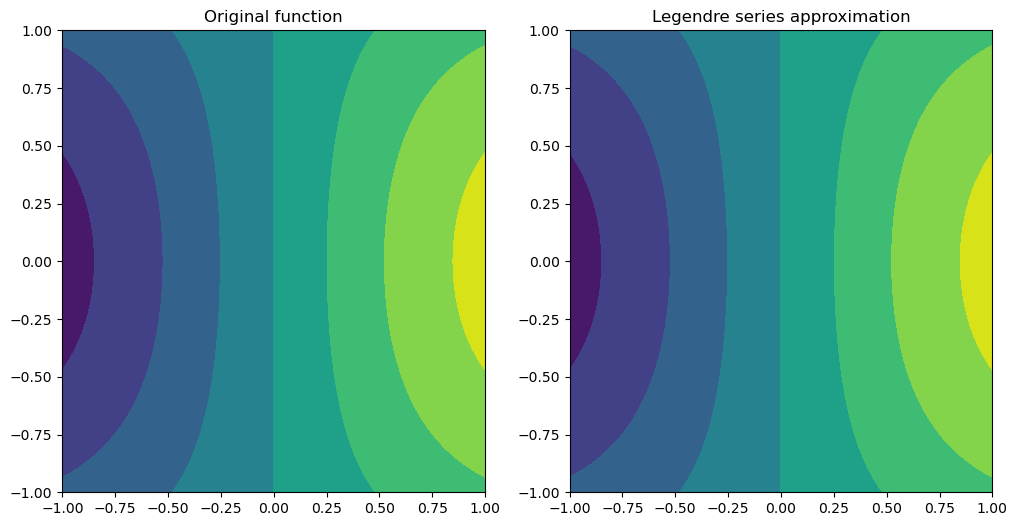

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Calculate the values of the function and the Legendre series approximation at the points
Z1 = f(X1, X2)
Z2 = evaluate_legendre_series(X1, X2, optimal_coefficients)

# Create a 3D plot
fig = plt.figure(figsize=(12, 6))

# Plot the function
ax1 = fig.add_subplot(121)
ax1.contourf(X1, X2, Z1, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax1.set_title('Original function')

# Plot the Legendre series approximation
ax2 = fig.add_subplot(122)
ax2.contourf(X1, X2, Z2, rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax2.set_title('Legendre series approximation')

# Display the plot
plt.show()